In [26]:
import numpy as np

In [27]:
data = [0.1, 0.2, 0.4, 0.1, 0.2]
# 计算数据的对数
log_data = np.log(data)
log_data

array([-2.30258509, -1.60943791, -0.91629073, -2.30258509, -1.60943791])

In [28]:
# 计算每个特征的均值
mean_log_data = np.mean(log_data, axis=0)
mean_log_data

-1.7480673485460891

In [29]:
# 中心
centered_log_data = log_data - mean_log_data
centered_log_data

array([-0.55451774,  0.13862944,  0.83177662, -0.55451774,  0.13862944])

In [30]:
# 计算每个特征的方差
var_log_data = np.var(centered_log_data, axis=0)
var_log_data

0.2690536877941928

In [31]:
normalized_log_data = centered_log_data / np.sqrt(var_log_data)
normalized_log_data

array([-1.06904497,  0.26726124,  1.60356745, -1.06904497,  0.26726124])

In [32]:
import numpy as np
import math


def log_centered_ratio_transform(data):
    D = data.shape[0]
    # 计算几何平均值 g(x)
    g = (np.prod(data)) ** (1 / (D - 1))
    transformed_data = np.zeros(D - 1)
    for i in range(1, D):
        y = data[i] / g
        transformed_data[i - 1] = math.log(y)
    return transformed_data

In [33]:
# 示例数据, 假设有 4 个成分, 总和为 1
data = np.array([0.2, 0.3, 0.1, 0.4])
transformed = log_centered_ratio_transform(data)
transformed

array([ 0.80678938, -0.29182291,  1.09447145])

In [34]:
from scipy.stats import chi2_contingency
import numpy as np

kf_data = np.array([[37, 27], [39, 21]])
kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=0.4054, p-value=0.5243, df=1 expected_frep=[[39.22580645 24.77419355]
 [36.77419355 23.22580645]]


In [35]:
from scipy.stats import chi2_contingency
import numpy as np

kf_data = np.array([[11.7, 8.7, 15.4, 8.4], [18.1, 11.7, 24.3, 13.6],
                    [26.9, 20.3, 37, 19.3], [41, 30.9, 54.6, 35.1],
                    [66, 54.3, 71.1, 50]])

kf = chi2_contingency(kf_data)
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=2.9208, p-value=0.9961, df=12 expected_frep=[[11.70042044  8.998674   14.46649418  9.03441138]
 [17.92123221 13.78303687 22.15795602 13.8377749 ]
 [27.39804334 21.07155563 33.87516171 21.15523933]
 [42.77800776 32.90012937 52.89107374 33.03078913]
 [63.90229625 49.14660414 79.00931436 49.34178525]]


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
print(iris.feature_names)
DTC.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.01908397, 0.        , 0.06162116, 0.91929487])

In [38]:
DTC.score(X_test, y_test)

0.9777777777777777

In [39]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, DTC.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [40]:
from sklearn.tree import export_graphviz

export_graphviz(
    DTC,
    out_file='classify_tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.tree import export_graphviz  

california = datasets.fetch_california_housing()
X = california.data
y = california.target

DTR = DecisionTreeRegressor(max_depth=3)

DTR.fit(X, y)

print(DTR.score(X, y))

export_graphviz(DTR, out_file='regress_tree.dot', feature_names=california.feature_names)


0.5341034720373742


In [1]:
from sklearn import datasets
import pandas as pd

california = datasets.fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


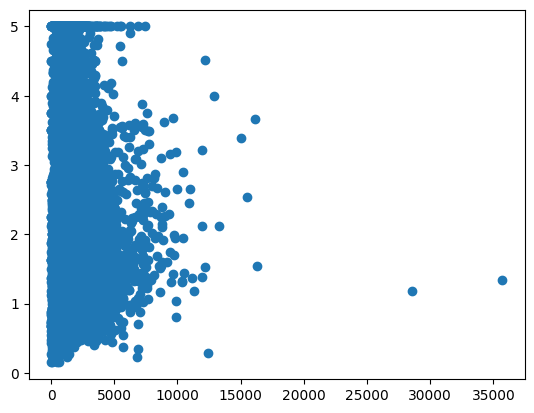

In [7]:
from matplotlib import pyplot as plt 

plt.scatter(california_df.Population, california.target)

In [8]:
california_df['const'] = 1
california_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,const
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1


In [9]:
from statsmodels.regression.linear_model import OLS

model = OLS(california.target, california_df[['const', 'Population']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.55
Date:                  周日, 25 8月 2024   Prob (F-statistic):           0.000398
Time:                        15:56:15   Log-Likelihood:                -32236.
No. Observations:               20640   AIC:                         6.448e+04
Df Residuals:                   20638   BIC:                         6.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1044      0.013    163.012      0.000       2.079       2.130
Population -2.512e-05   7.09e-06     -3.542      0.000    -3.9e-05   -1.12e-05
==============================================================================
Omnibus:                     2387.069   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3301.867
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                       3.311   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

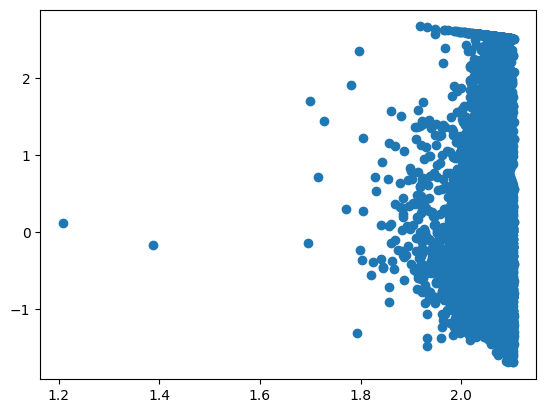

In [12]:
plt.scatter(model.fittedvalues, model.resid_pearson)